In [1]:
from species import SpeciesInit
from species.data.database import Database
from species.fit.emission_line import EmissionLine
from species.plot.plot_mcmc import plot_posterior
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pandas as pd
from astropy import units as u

In [2]:
from bdfit import bdfit_emissionline as bdfitel
%load_ext autoreload
%autoreload 2

Before starting, manually update species==0.9.1.dev
      
    in species.fit.emission_line.EmissionLine.lnlike_ultranest() attribute:
        - line 1184 update to: 
            species_db.add_samples(
                    sampler="ultranest",
                    samples=samples,
                    ln_prob=ln_prob,
                    tag=tag,
                    modelpar=modelpar,
                    attr_dict=attr_dict,
                    bounds = bounds,
                    normal_prior = {}, fixed_param={})

    in species.fit.emission_line.EmissionLine.integrate_flux() attribute:
        - line 470: remove @typechecked
        - line 767: update line to: return (line_flux, line_error), (line_lum_mean, line_lum_std)



In [3]:
DATADIR =  '/Users/sbetti/Documents/Science/datasets/TSpec/final_data/2MASS J11011926-7732383.fits'
OBJ_NAME = '2MASS J11011926-7732383'
save_name = '2MASS_J11011926-7732383'

In [4]:
# from astroquery.simbad import Simbad
# simbad = Simbad()
# simbad.add_votable_fields("parallax")
# result_table = simbad.query_object(OBJ_NAME)

# PARALLAX = result_table['PLX_VALUE'][0]
# PARALLAX_err = result_table['PLX_ERROR'][0]
# print(PARALLAX, PARALLAX_err)
# result_table[['MAIN_ID', 'PLX_VALUE', 'PLX_ERROR']]

In [5]:
# import gdown
# url = 'https://drive.google.com/uc?id=1QbJHcrndhaP2JIrBazy4zcUULpgClCdt76nMilKfRNs'
# output = "caspar.xlsx"
# gdown.download(url, output)

In [6]:
caspar = pd.read_excel('caspar.xlsx', sheet_name='Literature Database', skiprows=[1])
caspar['Mass jup'] = (np.array(caspar['Mass'].values)*u.Msun).to(u.Mjup).value
caspar['Radius jup'] = (np.array(caspar['Radius'].values)*u.Rsun).to(u.Rjup).value
caspar_obj = caspar[['Reference Name','GAIA EDR3 Parallax', 'GAIA EDR3 Parallax err', 'A_V', 'Teff', 'Mass','Mass jup', 'Radius jup']].loc[caspar['Reference Name']==OBJ_NAME]


PARALLAX = caspar_obj['GAIA EDR3 Parallax'].values[0]
PARALLAX_err = caspar_obj['GAIA EDR3 Parallax err'].values[0]

print(PARALLAX, PARALLAX_err)
caspar_obj

5.3603 0.149


,Reference Name,GAIA EDR3 Parallax,GAIA EDR3 Parallax err,A_V,Teff,Mass,Mass jup,Radius jup
204,2MASS J11011926-7732383,5.3603,0.149,1.59,2838.0,0.05,52.378276,5.741384


In [7]:
Av = 2.32

radius = 0.634 * u.Rsun
radius_err = 0.042  * u.Rsun

mass = 0.033*u.Msun
mass_err = 0.011 *u.Msun

print(Av, radius, radius_err, mass, mass_err)


2.32 0.634 solRad 0.042 solRad 0.033 solMass 0.011 solMass


In [8]:
a = fits.getdata(DATADIR)
wave = a[0]
flux = a[1]
err = a[2]

np.savetxt(f'{save_name}_fullres.dat', np.c_[wave, flux, err])

 ############################## Xspextool History ############################## [astropy.io.fits.card]
 ############################## Xcombspec History ############################## [astropy.io.fits.card]
 ############################### Xtellcor History ############################## [astropy.io.fits.card]
 ############################# Xmergeorders History ############################ [astropy.io.fits.card]


In [9]:
# for TripleSpec.  Only necessary for upper limit derivation
deltalambda_BrG = 2.877
deltalambda_PaB=1.72
deltalambda_PaG=1.43

In [10]:
bd = bdfitel.bdfit_emissionline(OBJ_NAME, PARALLAX, PARALLAX_err, Av, [mass, mass_err], [radius, radius_err],
                        f'{save_name}_fullres.dat', Rin=5*u.Rsun, save_name=save_name)


species

Version: 0.9.1.dev71+g96da3de.d20250528
Working folder: /Users/sbetti/Documents/Science/NIRAccretion/TSpec/bdfit/example

Configuration file: /Users/sbetti/Documents/Science/NIRAccretion/TSpec/bdfit/example/species_config.ini
Database file: species_database.hdf5
Data folder: data

Configuration settings:
   - Database: species_database.hdf5
   - Data folder: data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py not installed

----------
Add object
----------

Object name: 2MASS J11011926-7732383
Units: None
Deredden: 2.32
Parallax (mas) = 5.36 +/- 0.15

Spectra:
   - Spectrum:
      - Database tag: 2MASS J11011926-7732383
      - Filename: 2MASS_J11011926-7732383_fullres.dat
      - Data shape: (6258, 3)
      - Wavelength range (um): 0.95 - 2.47
      - Mean flux (W m-2 um-1): 9.58e-15
      - Mean error (W m-2 um-1): 4.24e-17
      - Dereddening A_V: 2.32
   - Instrument resolution:
      - 2MASS J11011926-7732383: 2700.0


/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/species/data/database.py:1496: UserWarning: Found 1712 fluxes with NaN in the data of 2MASS J11011926-7732383. Removing the spectral fluxes that contain a NaN.
  warnings.warn(


Hydrogen line = Pag
Rest wavelength (um) = 1.0935
Fitting continuum... [DONE]
Plotting continuum fit... [DONE]


/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


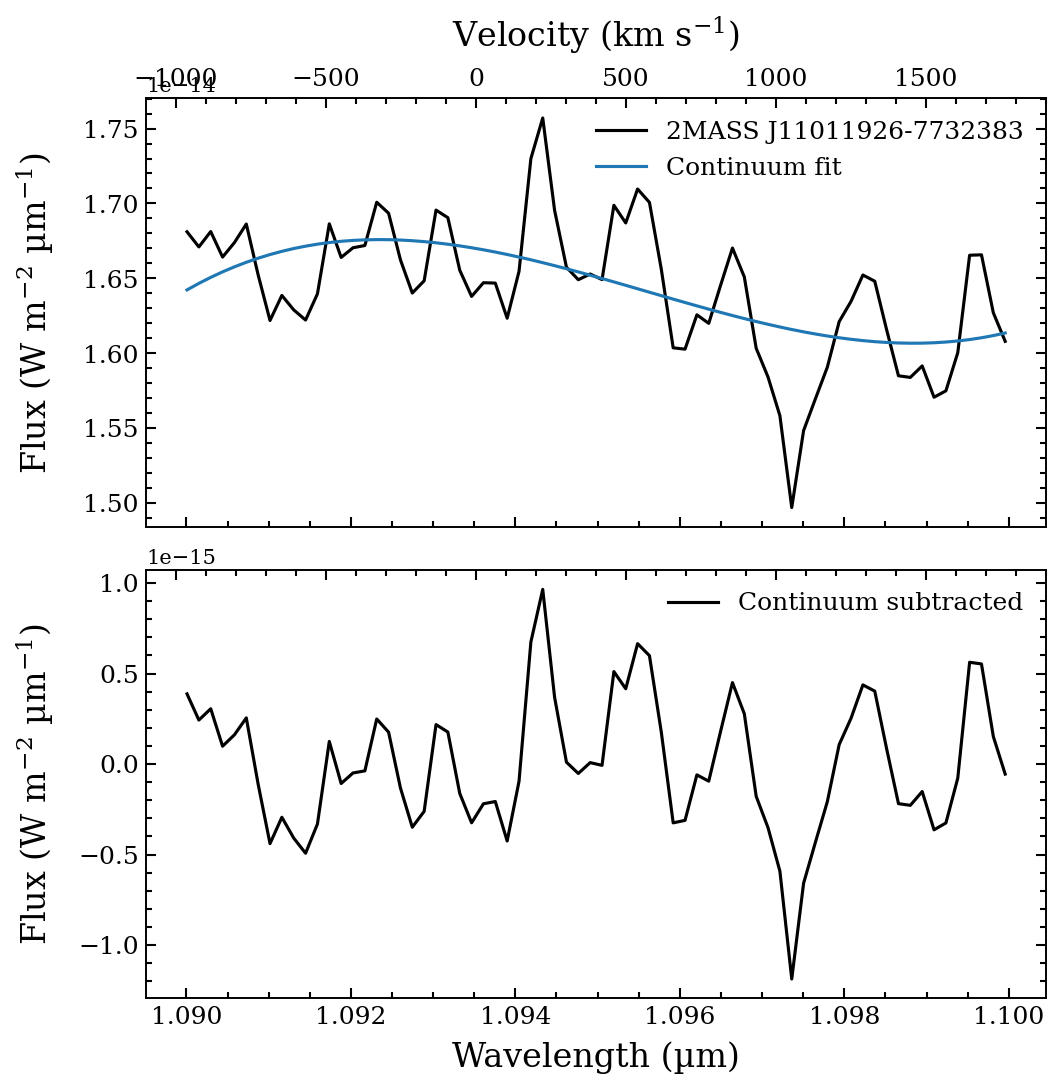

Creating directory for new run ultranest/run13
[ultranest] Sampling 100 live points from prior ...


/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/ultranest/integrator.py:1903: UserWarning: Sampling from region seems inefficient (0/40 accepted in iteration 2500). To improve efficiency, modify the transformation so that the current live points (stored for you in ultranest/run13/extra/sampling-stuck-it%d.csv) are ellipsoidal, or use a stepsampler, or set frac_remain to a lower number (e.g., 0.5) to terminate earlier.
  u, v, logl, nc, quality = self._refill_samples(Lmin, ndraw, nit)


[ultranest] Explored until L=-1e+03  444.86 [-1444.9348..-1444.9067] | it/evals=2190/108422 eff=2.0208% N=99 
[ultranest] Likelihood function evaluations: 108424
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -1462 +- 0.3291
[ultranest] Effective samples strategy satisfied (ESS = 479.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 97 minimum live points (dlogz from 0.24 to 0.92, need <0.5)
[ultranest]   logZ error budget: single: 0.40 bs:0.33 tail:0.01 total:0.33 required:<0.50
[ultranest] done iterating.
Log-evidence = -1462.12 +/- 0.92
Best-fit parameters (mean +/- std):
   - gauss_amplitude = 1.04e-15 +/- 4.64e-17
   - gauss_mean = 1.09e+00 +/- 6.53e-06
   - gauss_sigma = 1.13e-04 +/- 5.41e-06
Maximum likelihood sample:
   - Log-likelihood = -1.44e+03
   - gauss_amplitude = 1.04e-15
   - gauss_me

/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/species/fit/emission_line.py:1394: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(plot_filename, bbox_inches="tight")
/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/species/fit/emission_line.py:1394: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(plot_filename, bbox_inches="tight")



---------------------
Get posterior samples
---------------------

Database tag: Pag
Random samples: None
Samples shape: (2291, 9)

Parameters:
   - gauss_amplitude
   - gauss_mean
   - gauss_sigma
   - gauss_fwhm
   - line_flux
   - log_line_lum
   - log_acc_lum
   - line_eq_width
   - line_vrad

Uniform priors (min, max):
   - gauss_amplitude = (0.0, 1e-14)
   - gauss_mean = (1.0900073051452637, 1.0999566316604614)
   - gauss_sigma = (0.0, 0.009949326515197754)

----------------------------
Plot posterior distributions
----------------------------

Database tag: Pag
Object type: star
Manual parameters: None

Model type: emission line
Model name: gaussian
Sampler: ultranest

Median parameters:
   - gauss_amplitude = 1.04e-15
   - gauss_mean = 1.09
   - gauss_sigma = 1.13e-04
   - gauss_fwhm = 72.70
   - line_flux = 2.93e-19
   - log_line_lum = -6.50
   - log_acc_lum = -3.21
   - line_eq_width = -0.18
   - line_vrad = 215.18
   - parallax = 5.36

Sample with the maximum likelihood:
  

/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/corner/core.py:133: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(



Output: 2MASS_J11011926-7732383_Pag_fitting_posterior.pdf


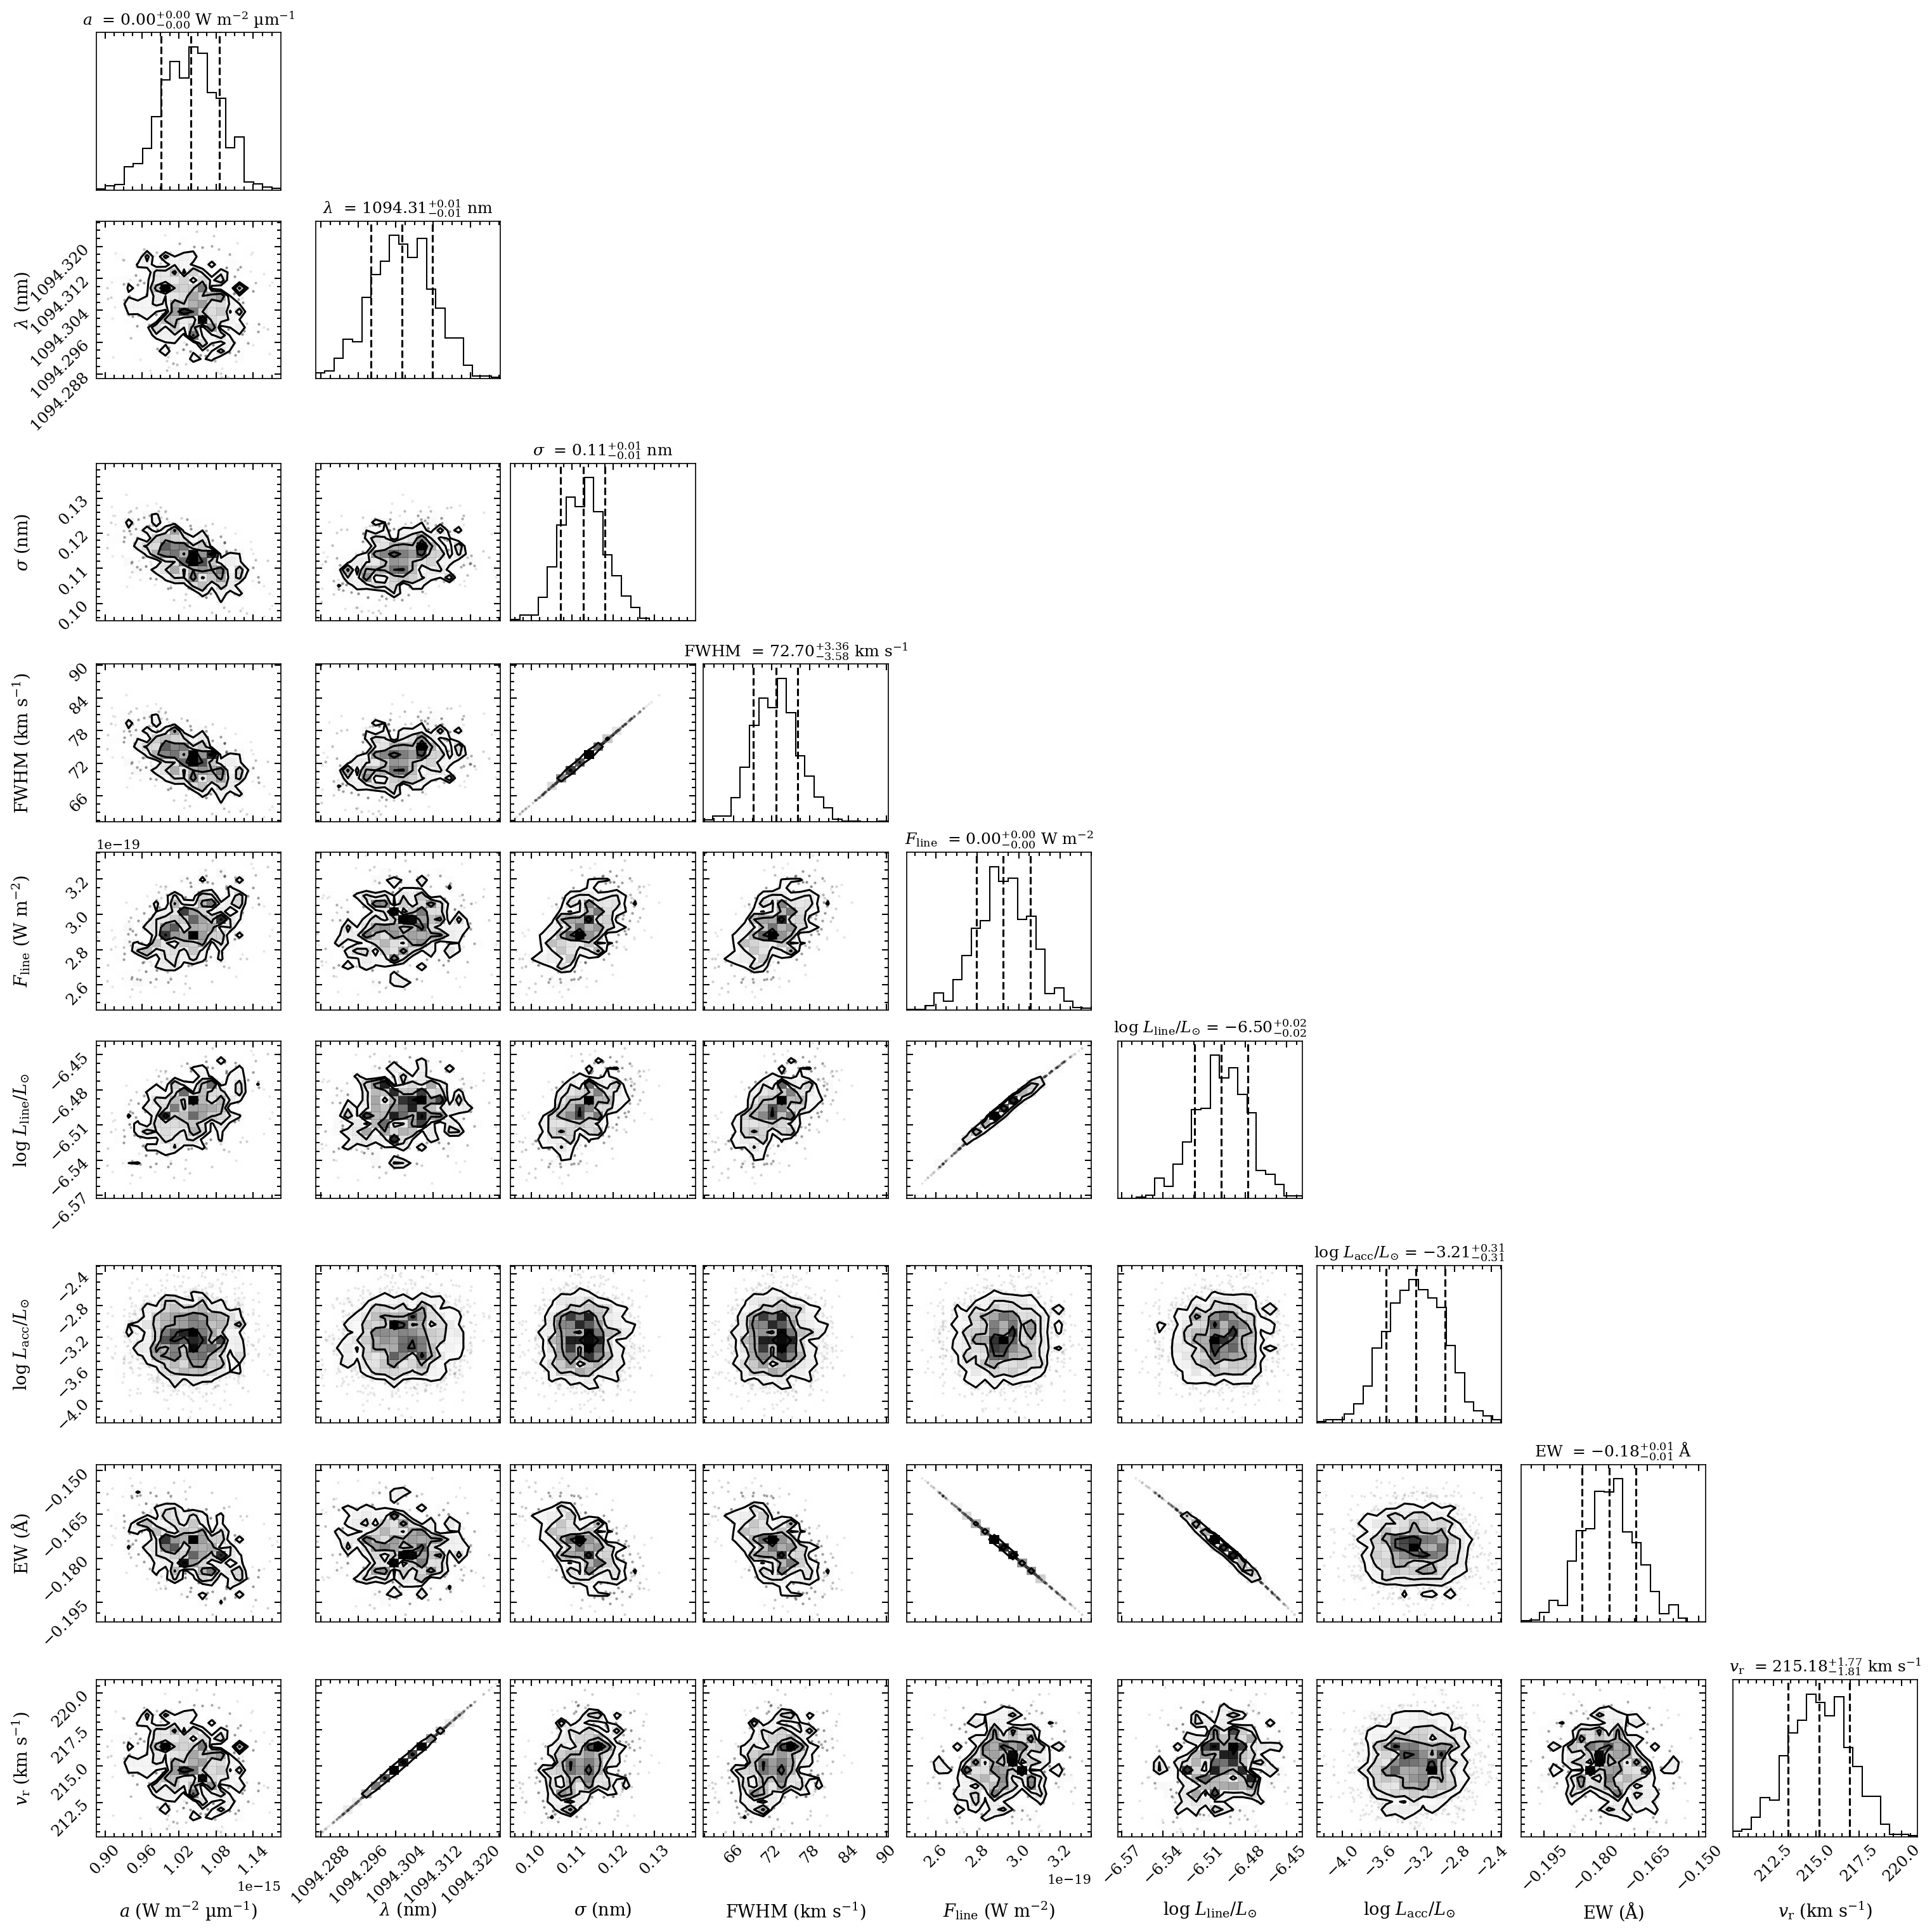


---------------------
Get median parameters
---------------------

Database tag: Pag

Parameters:
   - gauss_amplitude = 1.04e-15
   - gauss_mean = 1.09
   - gauss_sigma = 1.13e-04
   - gauss_fwhm = 72.70
   - line_flux = 2.93e-19
   - log_line_lum = -6.50e+00
   - log_acc_lum = -3.21e+00
   - line_eq_width = -1.76e-01
   - line_vrad = 215.18
   - parallax = 5.36


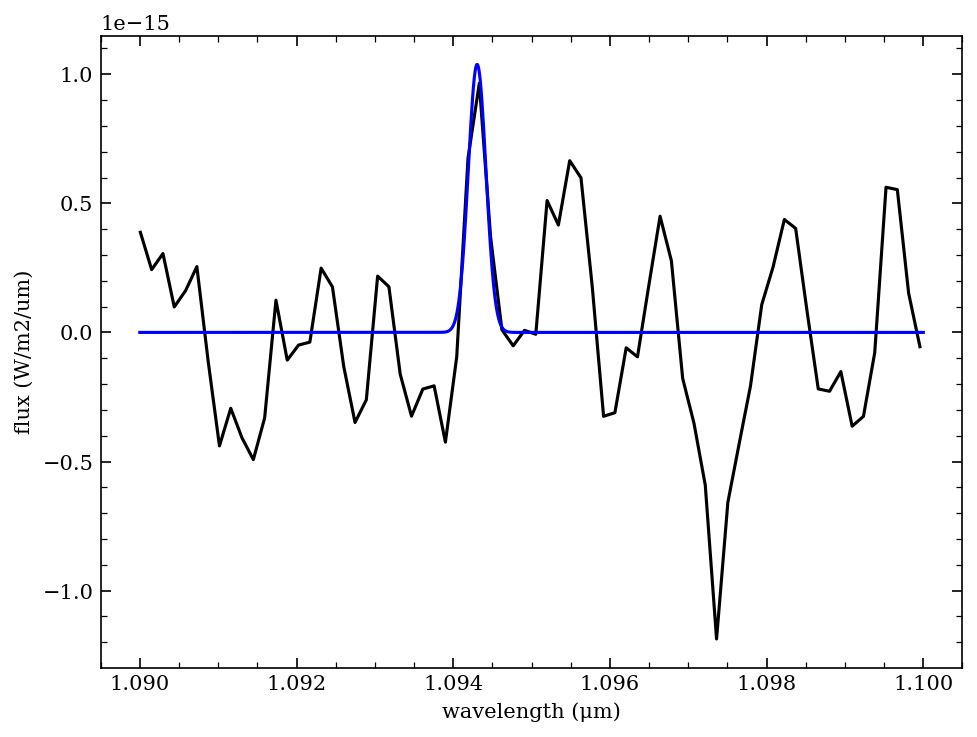


---------------------
Get posterior samples
---------------------

Database tag: Pag
Random samples: None
Samples shape: (2291, 9)

Parameters:
   - gauss_amplitude
   - gauss_mean
   - gauss_sigma
   - gauss_fwhm
   - line_flux
   - log_line_lum
   - log_acc_lum
   - line_eq_width
   - line_vrad

Uniform priors (min, max):
   - gauss_amplitude = (0.0, 1e-14)
   - gauss_mean = (1.0900073051452637, 1.0999566316604614)
   - gauss_sigma = (0.0, 0.009949326515197754)
Line Flux:  2.925052498083005e-19 W / m2 +/- 1.2906653689781563e-20 W / m2
Line Luminosity:  3.181958399029643e-07 solLum +/- 1.4369165918142998e-08 solLum
LOG Line Luminosity:  -6.497305502624689 solLum +/- 0.019598678632554822 solLum
LOG Lacc_Lsun:  -4.476658823254615 solLum +/- 0.4748310525172742 solLum
Lacc_Lsun:  3.3368845162857827e-05 solLum +/- 3.649003059253109e-05 solLum
Mdot Msun/yr: 2.33820789660955e-11 solMass / yr +/- 2.6775496904488284e-11 solMass / yr

Log(Mdot):  -10.631116877119295 solMass / yr +/- 0.49698598

In [11]:
bd.run_measure_object( 'Pag', (1.09, 1.1), deltalambda=deltalambda_PaG, integrate_line=False, verbose=True,
                      fit_line=True, upper_limit=False)



Hydrogen line = Pab
Rest wavelength (um) = 1.2815
Fitting continuum... [DONE]
Plotting continuum fit... [DONE]


/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


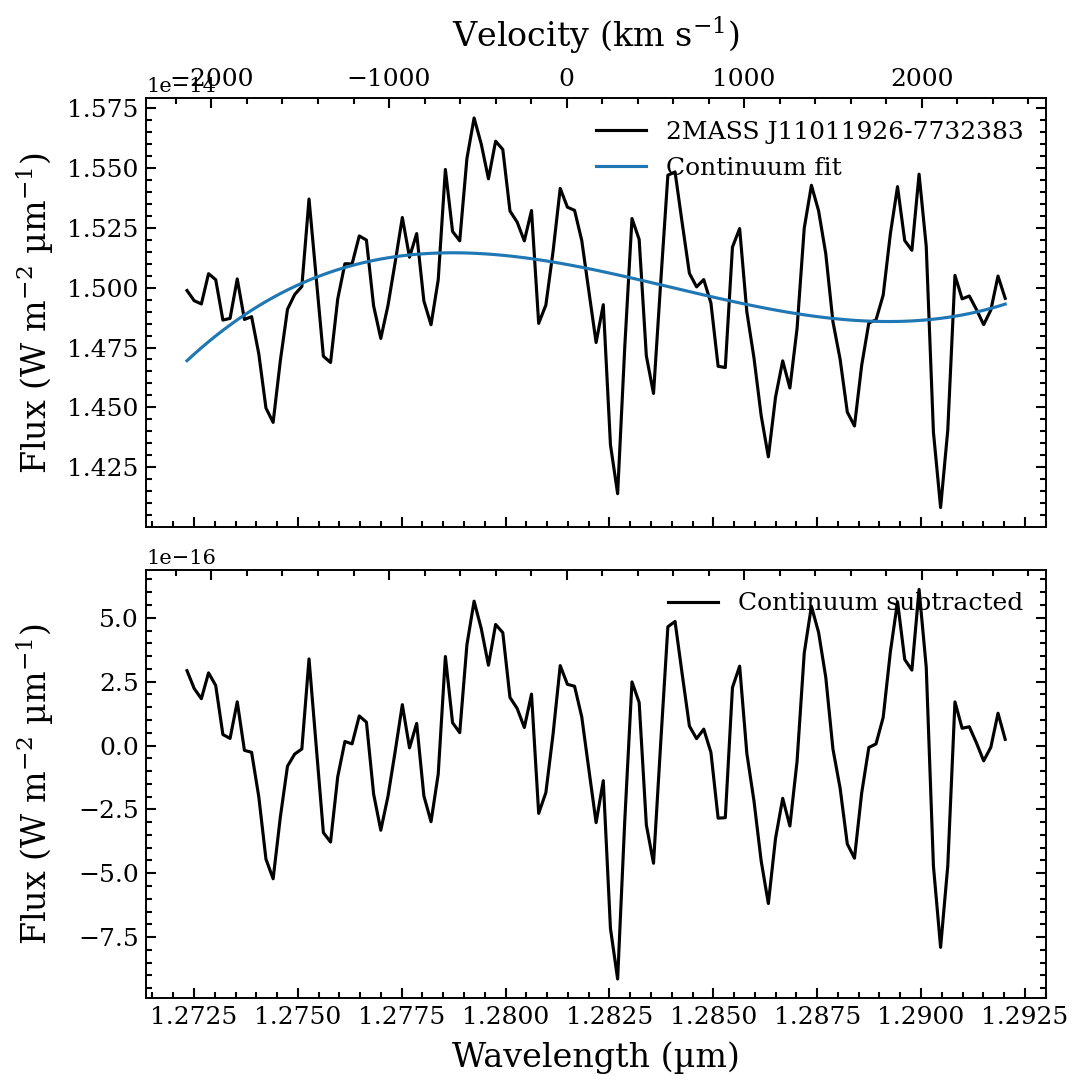

0.634 solRad 5.0 solRad


/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


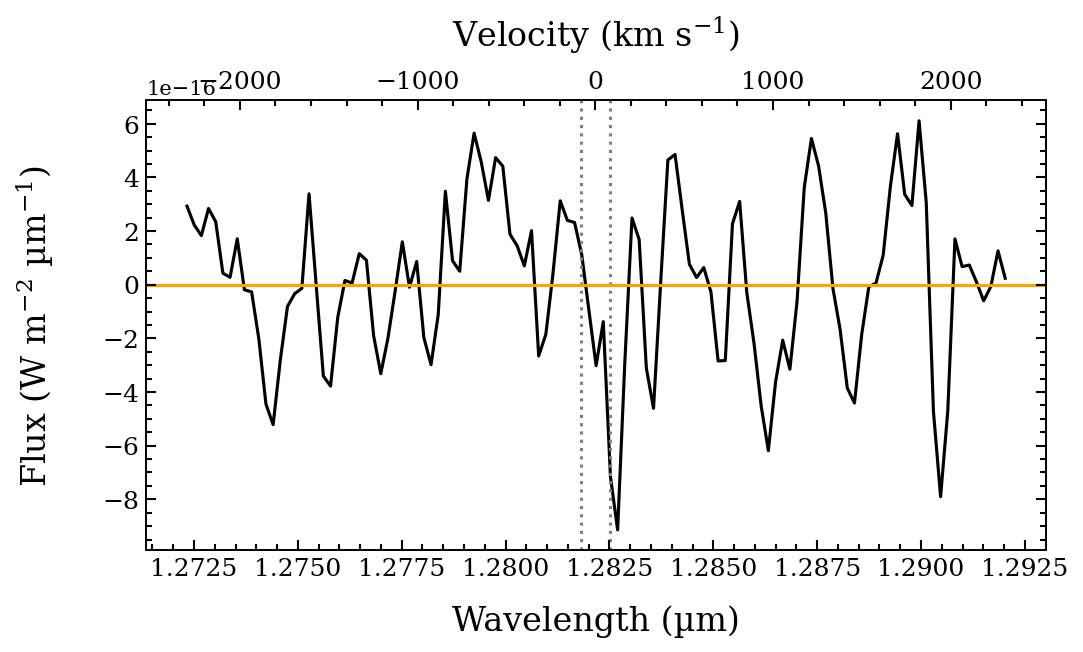

Line Flux <  3.1244793079989967e-15 W / m2
Line Luminosity <  0.0033989007661221157 solLum
LOG Line Luminosity <  -2.468661514838741 solLum
Accretion Luminosity <  1.390653055241757 solLum
LOG Accretion Luminosity <  0.14321879427093442 solLum
Accretion Rate <  9.74452648672961e-07 solMass / yr
LOG Accretion Rate <  -6.0112392595937445 solMass / yr


In [16]:
bd.run_measure_object('Pab', (1.28216-0.01, 1.28216+0.01), deltalambda=deltalambda_PaB,integrate_line=False, verbose=True,
                      fit_line=False, upper_limit=True)


Hydrogen line = Brg
Rest wavelength (um) = 2.1649
Fitting continuum... [DONE]
Plotting continuum fit... [DONE]


/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


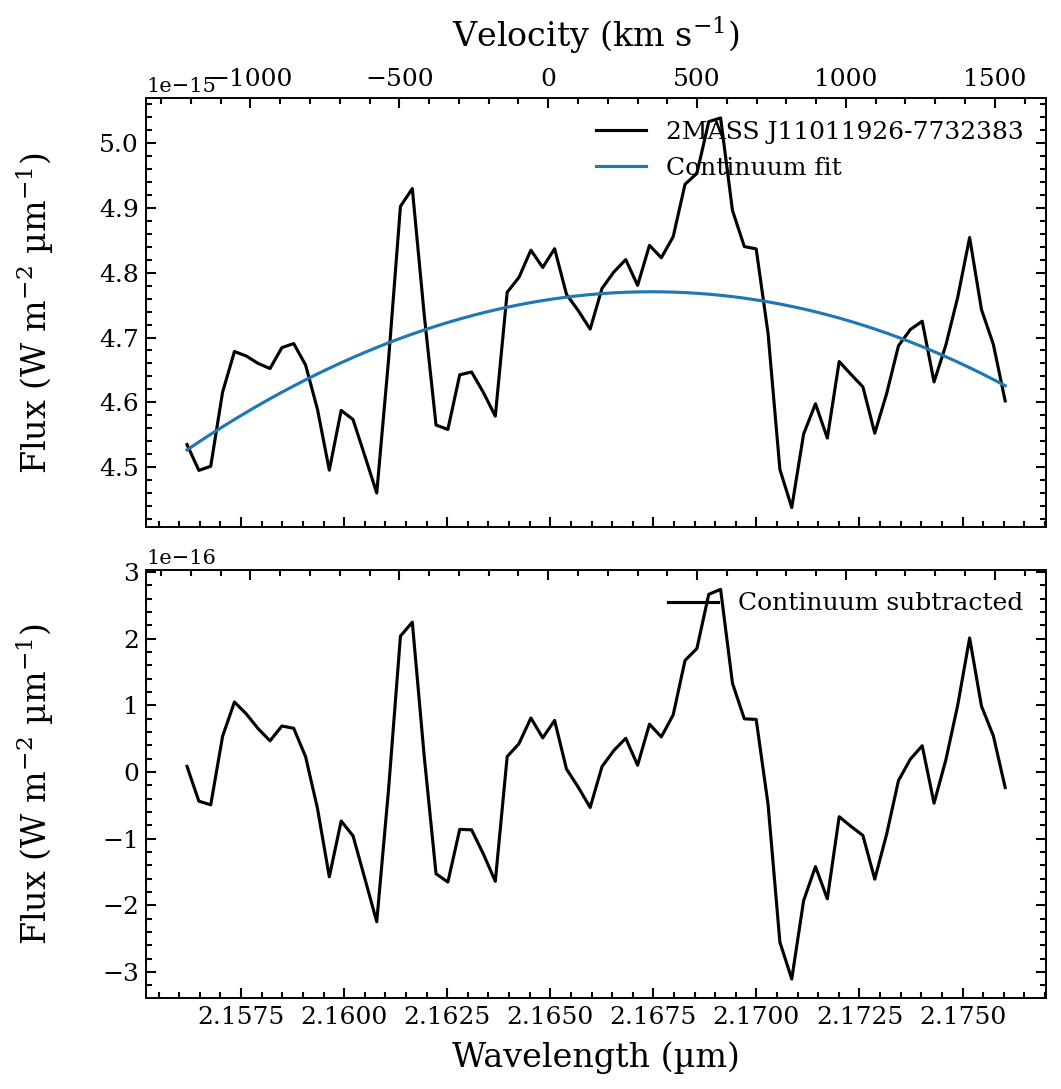

0.634 solRad 5.0 solRad


/Users/sbetti/miniconda3/envs/accretion/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


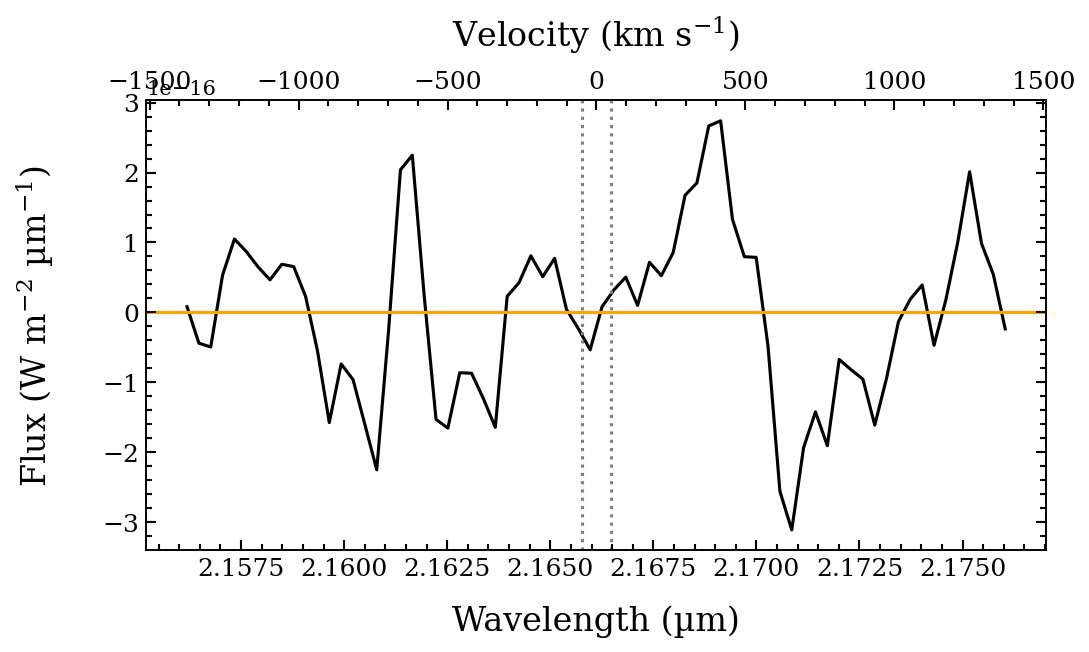

Line Flux <  1.4739519216567375e-15 W / m2
Line Luminosity <  0.0016034083832530402 solLum
LOG Line Luminosity <  -2.7949558500694165 solLum
Accretion Luminosity <  4.9431357620271354 solLum
LOG Accretion Luminosity <  0.694002538417394 solLum
Accretion Rate <  3.4637336163044604e-06 solMass / yr
LOG Accretion Rate <  -5.460455515447285 solMass / yr


In [13]:
bd.run_measure_object('Brg', (2.16612-0.01, 2.16612+0.01), deltalambda=deltalambda_BrG, integrate_line=False, verbose=True, 
                      fit_line=False, upper_limit=True)


In [14]:
bd.save_parameters()

                                         Value
Pag_Line_Flux                     2.925052e-19
Pag_Line_Flux_err                 1.290665e-20
Pag_Line_Luminosity               3.181958e-07
Pag_Line_Luminosity_err           1.436917e-08
LOG_Pag_Line_Luminosity          -6.497306e+00
LOG_Pag_Line_Luminosity_err       1.959868e-02
Pag_Accretion_Luminosity          3.336885e-05
Pag_Accretion_Luminosity_err      3.649003e-05
LOG_Pag_Accretion_Luminosity     -4.476659e+00
LOG_Pag_Accretion_Luminosity_err  4.748311e-01
Pag_Accretion_Rate                2.338208e-11
Pag_Accretion_Rate_err            2.677550e-11
LOG_Pag_Accretion_Rate           -1.063112e+01
LOG_Pag_Accretion_Rate_err        4.969860e-01
LOG_Mass                         -1.481486e+00
LOG_Mass_err                      1.446667e-01
Pab_Line_Flux                     5.957979e-19
Pab_Line_Flux_err                 2.849069e-20
Pab_Line_Luminosity               6.481266e-07
Pab_Line_Luminosity_err           3.178011e-08
LOG_Pab_Line_

 ############################## Xspextool History ############################## [astropy.io.fits.card]
 ############################## Xcombspec History ############################## [astropy.io.fits.card]
 ############################### Xtellcor History ############################## [astropy.io.fits.card]
 ############################# Xmergeorders History ############################ [astropy.io.fits.card]


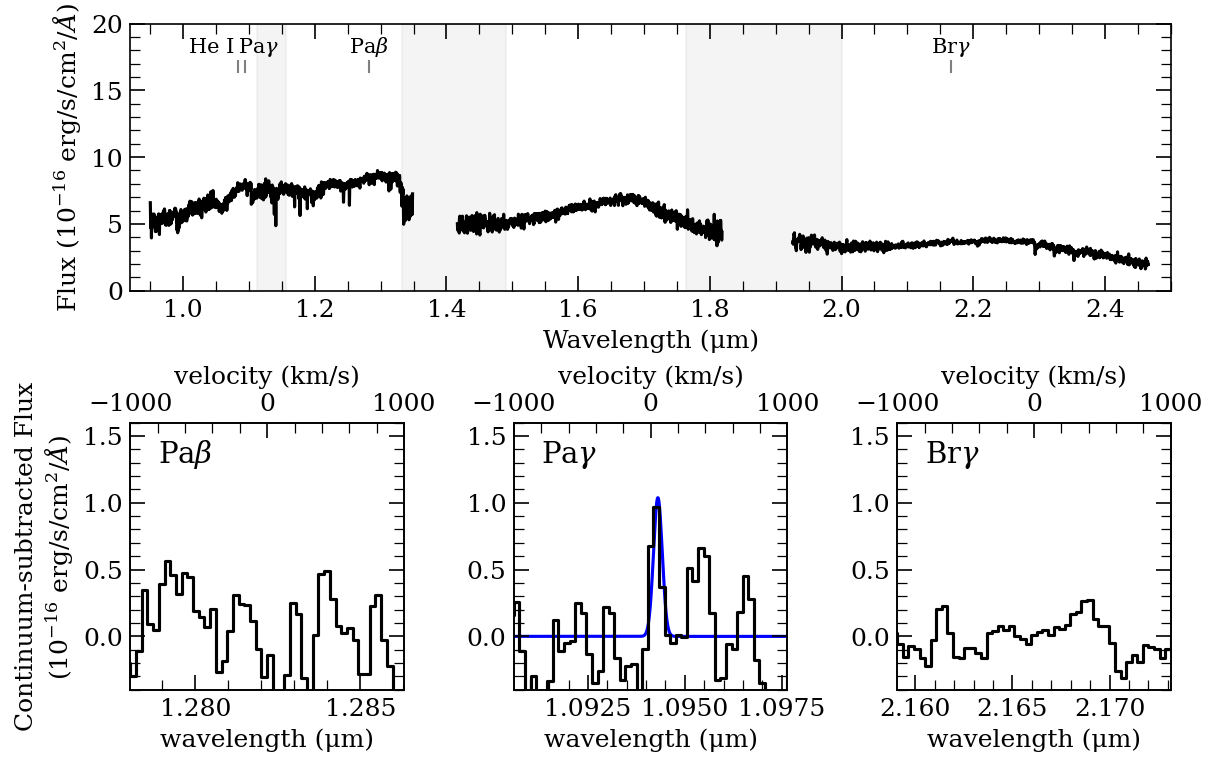

In [19]:

bdfitel.indiv_plots(DATADIR, f'{save_name}_Pab_contsub_spec.txt',
                    f'{save_name}_Pag_contsub_spec.txt',
                    f'{save_name}_Brg_contsub_spec.txt',
                    'um', 'W/m2/um', fs=12, 
                    PaBmodel=None,
                    PaGmodel=f'{save_name}_Pag_bestfit_gaussian.txt',
                    BrGmodel=None,
                   ylimlines = [-0.4, 1.6],
                   ylimspec = [0, 20])